# About Dataset

## Context
### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
### Attributes

### People

**ID:** Customer's unique identifier

**Year_Birth:** Customer's birth year

**Education:** Customer's education level

**Marital_Status:** Customer's marital status

**Income:** Customer's yearly household income

**Kidhome:** Number of children in customer's household

**Teenhome:** Number of teenagers in customer's household

**Dt_Customer:** Date of customer's enrollment with the company

**Recency:** Number of days since customer's last purchase

**Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

### Products

**MntWines:** Amount spent on wine in last 2 years

**MntFruits:** Amount spent on fruits in last 2 years

**MntMeatProducts:** Amount spent on meat in last 2 years

**MntFishProducts:** Amount spent on fish in last 2 years

**MntSweetProducts:** Amount spent on sweets in last 2 years

**MntGoldProds:** Amount spent on gold in last 2 years

### Promotion

**NumDealsPurchases**: Number of purchases made with a discount

**AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise

**AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

**AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

**AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise

**AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise

**Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise


### Place

**NumWebPurchases:** Number of purchases made through the company’s website

**NumCatalogPurchases:** Number of purchases made using a catalogue

**NumStorePurchases:** Number of purchases made directly in stores

**NumWebVisitsMonth:** Number of visits to company’s website in the last month


### Target
Need to perform clustering to summarize customer segments.

In [25]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Loading dataset
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [27]:
data.info(verbose=True, show_counts=True)
df = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [28]:
list_keys = df.columns.tolist()
df_describe = df[list_keys]
df_describe.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [29]:
# Null data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [30]:
# Delete missing values
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [31]:
# Check for duplicated values
df.duplicated().sum()

0

In [32]:
# Show unique values for column
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

## Transforming Data

### Not numeric columns
Education

Marital_Status

Dt_Customer

In [33]:
#df['Education'].unique()
data["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [34]:
#df['Marital_Status'].unique()
data["Marital_Status"].value_counts()


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [35]:
df['Dt_Customer'].unique()

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '31-05-2013', '22-11-2013', '22-05-2014', '11-05-2013',
       '29-10-2012', '20-02-2013', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '02-10-2013', '28-06-2014', '09-11-2012',
       '24-05-2013', '08-11-2012', '12-05-2014', '11-08-2012',
       '07-06-2014', '12-06-2013', '19-11-2012', '02-04-2013',
       '28-04-2014', '03-03-2014', '04-07-2013', '07-09-2012',
       '18-02-2013', '11-06-2013', '06-12-2013', '21-05-2013',
       '11-05-2014', '19-03-2014', '27-09-2013', '08-04-2013',
       '11-09-2012', '17-03-2013', '05-04-2013', '30-04

In [36]:
df["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='mixed')
df["Dt_Customer"] 

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [37]:
education_mapping = {'Graduation':1, 'PhD':2, 'Master':2, 'Basic':0, '2n Cycle':1}
marital_status_mapping = {'Single':1, 'Together':0, 'Married':0, 'Divorced':1, 'Widow':1, 'Alone':1,'Absurd':1, 'YOLO':1}

df = df.replace({'Education': education_mapping, 'Marital_Status': marital_status_mapping})

                           ID  Year_Birth  Education  Marital_Status  \
ID                   1.000000    0.002355  -0.014776       -0.017921   
Year_Birth           0.002355    1.000000  -0.177416       -0.002033   
Education           -0.014776   -0.177416   1.000000       -0.001639   
Marital_Status      -0.017921   -0.002033  -0.001639        1.000000   
Income               0.013095   -0.161791   0.130644       -0.004663   
Kidhome              0.001736    0.233615  -0.041259       -0.026788   
Teenhome            -0.003030   -0.350791   0.123733       -0.031651   
Dt_Customer          0.006275   -0.026243   0.066631        0.003027   
Recency             -0.044376   -0.016295  -0.023818        0.001371   
MntWines            -0.021084   -0.159451   0.191181        0.007244   
MntFruits            0.007326   -0.017747  -0.085600        0.025988   
MntMeatProducts     -0.005902   -0.033697   0.031395        0.023313   
MntFishProducts     -0.023992   -0.040425  -0.098541        0.01

<Axes: >

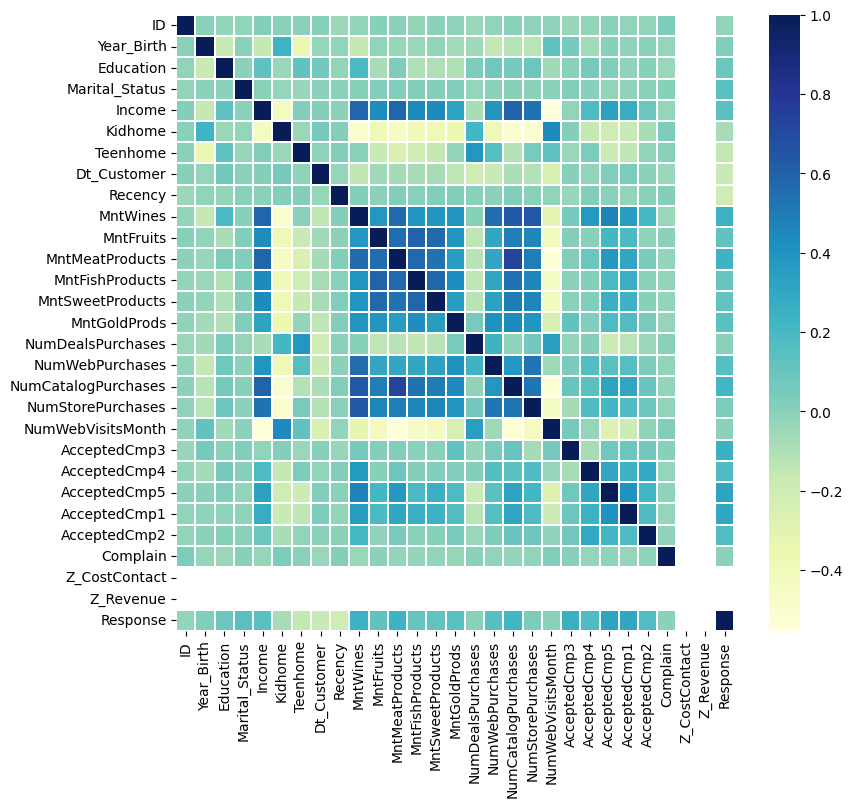

In [38]:
# Getting the correlation 
print(df.corr())
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

## Data Engineering

In [39]:
# Status Alone (0: Alone, 1: Partner)
df["Alone"] = df["Marital_Status"].replace(marital_status_mapping)

# Education levels (0: undergraduate, graduate: 1, postgraduate: 2)
df["Education"] = df["Education"].replace(education_mapping)

# Total spending
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"]+  df["MntSweetProducts"] + df["MntGoldProds"]

# Total children
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Total members
df["Family_Size"] = df["Alone"].replace({1: 1, 0:2}) + df["Children"]

# Dropping redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [40]:
df.describe()

Education         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean      1.357401   52247.251354     0.441787     0.505415    49.012635   
std       0.527757   25173.076661     0.536896     0.544181    28.948352   
min       0.000000    1730.000000     0.000000     0.000000     0.000000   
25%       1.000000   35303.000000     0.000000     0.000000    24.000000   
50%       1.000000   51381.500000     0.000000     0.000000    49.000000   
75%       2.000000   68522.000000     1.000000     1.000000    74.000000   
max       2.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2216.000000  2216.000000      2216.000000      2216.000000   
mean    305.091606    26.356047       166.995939        37.637635   
std     337.327920    39.793917       224.283273        54.752082   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     174.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       232.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
count       2216.000000  ...   2216.000000   2216.000000   2216.000000   
mean          27.028881  ...      0.074007      0.073105      0.064079   
std           41.072046  ...      0.261842      0.260367      0.244950   
min            0.000000  ...      0.000000      0.000000      0.000000   
25%            1.000000  ...      0.000000      0.000000      0.000000   
50%            8.000000  ...      0.000000      0.000000      0.000000   
75%           33.000000  ...      0.000000      0.000000      0.000000   
max          262.000000  ...      1.000000      1.000000      1.000000   

       AcceptedCmp2     Complain     Response        Alone        Spent  \
count   2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean       0.013538     0.009477     0.150271     0.354693   607.075361   
std        0.115588     0.096907     0.357417     0.478528   602.900476   
min        0.000000     0.000000     0.000000     0.000000     5.000000   
25%        0.000000     0.000000     0.000000     0.000000    69.000000   
50%        0.000000     0.000000     0.000000     0.000000   396.500000   
75%        0.000000     0.000000     0.000000     1.000000  1048.000000   
max        1.000000     1.000000     1.000000     1.000000  2525.000000   

          Children  Family_Size  
count  2216.000000  2216.000000  
mean      0.947202     2.592509  
std       0.749062     0.905722  
min       0.000000     1.000000  
25%       0.000000     2.000000  
50%       1.000000     3.000000  
75%       1.000000     3.000000  
max       3.000000     5.000000  

[8 rows x 27 columns]

                     Education    Income   Kidhome  Teenhome   Recency  \
Education             1.000000  0.130644 -0.041259  0.123733 -0.023818   
Income                0.130644  1.000000 -0.428669  0.019133 -0.003970   
Kidhome              -0.041259 -0.428669  1.000000 -0.039869  0.011492   
Teenhome              0.123733  0.019133 -0.039869  1.000000  0.013838   
Recency              -0.023818 -0.003970  0.011492  0.013838  1.000000   
MntWines              0.191181  0.578650 -0.497336  0.003747  0.015721   
MntFruits            -0.085600  0.430842 -0.373396 -0.176558 -0.005844   
MntMeatProducts       0.031395  0.584633 -0.439261 -0.261122  0.022518   
MntFishProducts      -0.098541  0.438871 -0.388884 -0.205242  0.000551   
MntSweetProducts     -0.097451  0.440744 -0.378026 -0.163056  0.025110   
MntGoldProds         -0.095730  0.325916 -0.355029 -0.019887  0.017663   
NumDealsPurchases     0.036795 -0.083101  0.216913  0.386246  0.002115   
NumWebPurchases       0.083471  0.3878

<Axes: >

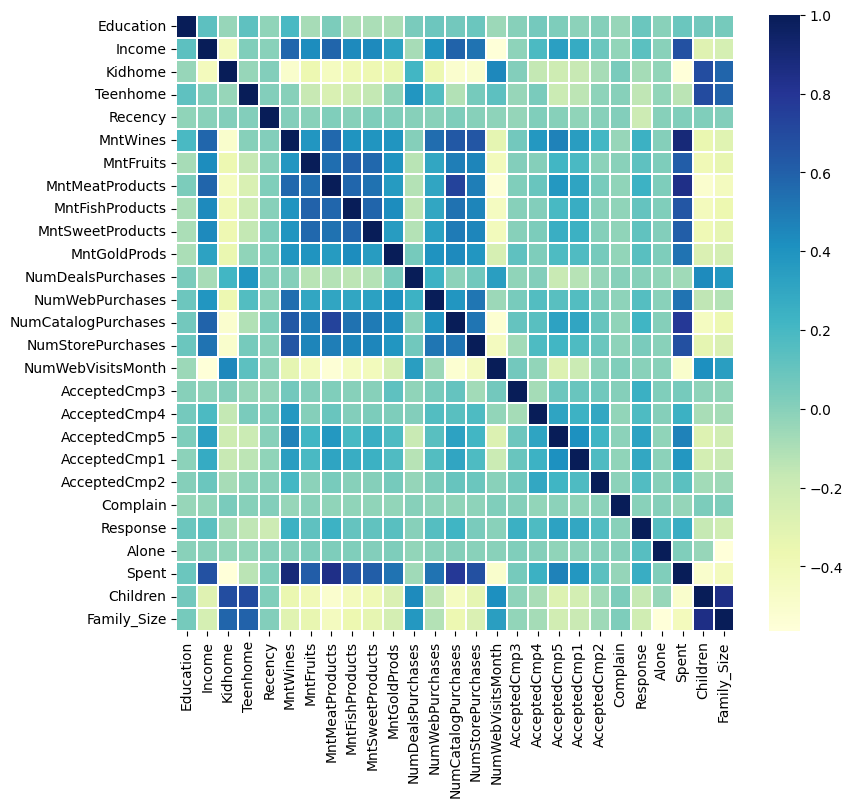

In [41]:
# Getting the correlation 
print(df.corr())
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

## Univariate analysis

### Education

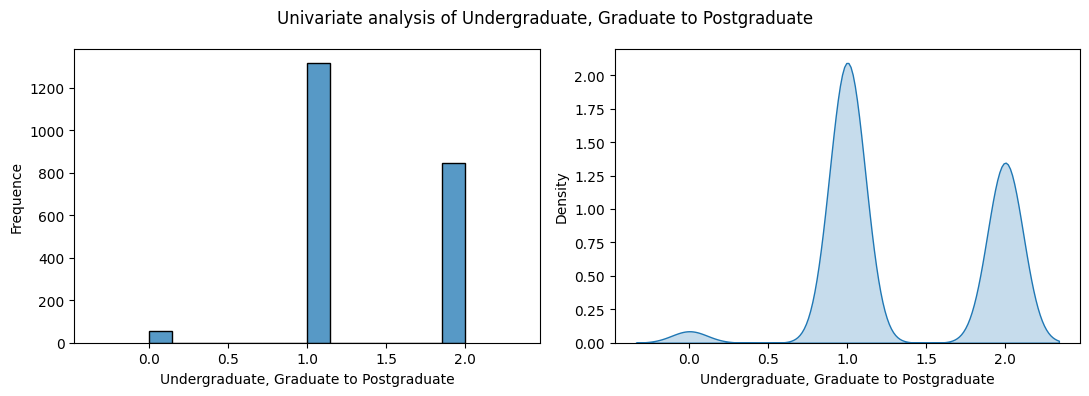

In [42]:
var = 'Education'
var_title = 'Undergraduate, Graduate to Postgraduate'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Income

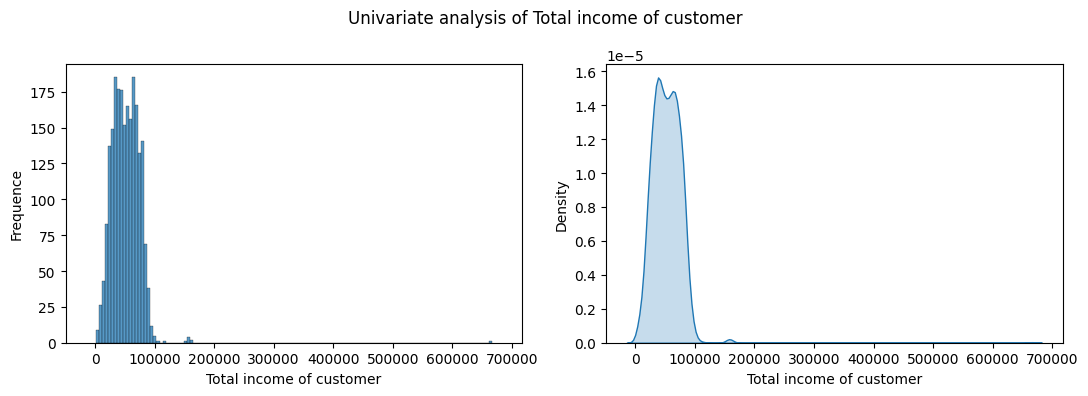

In [43]:
var = 'Income'
var_title = 'Total income of customer'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

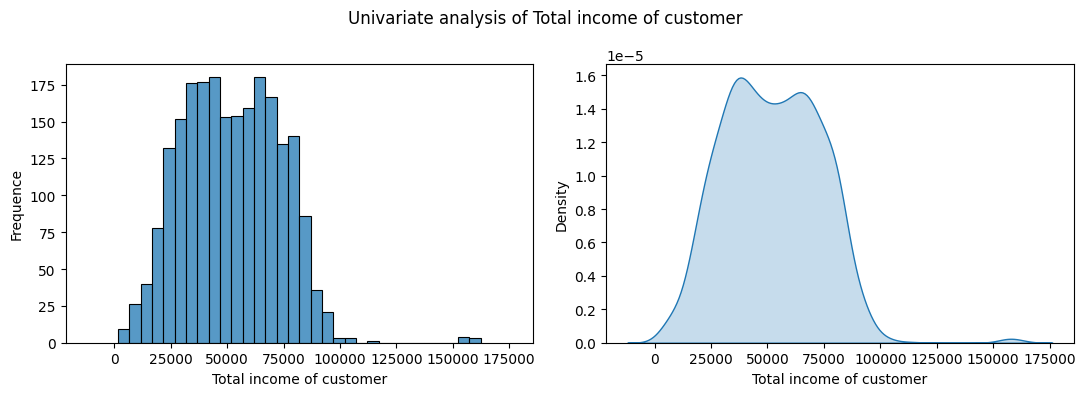

In [44]:
df = df.loc[df['Income'] < 200000] # (???) ask how to remove by percentage
var = 'Income'
var_title = 'Total income of customer'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Kidhome

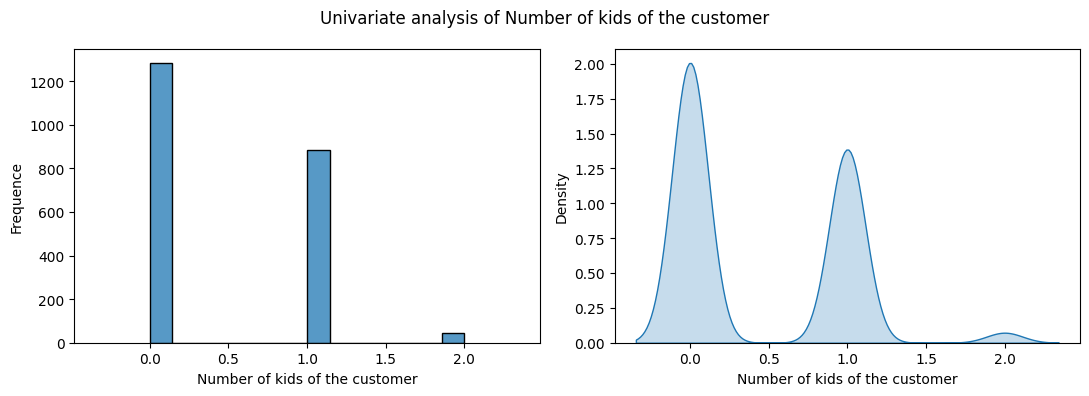

In [45]:
var = 'Kidhome'
var_title = 'Number of kids of the customer'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Teenhome

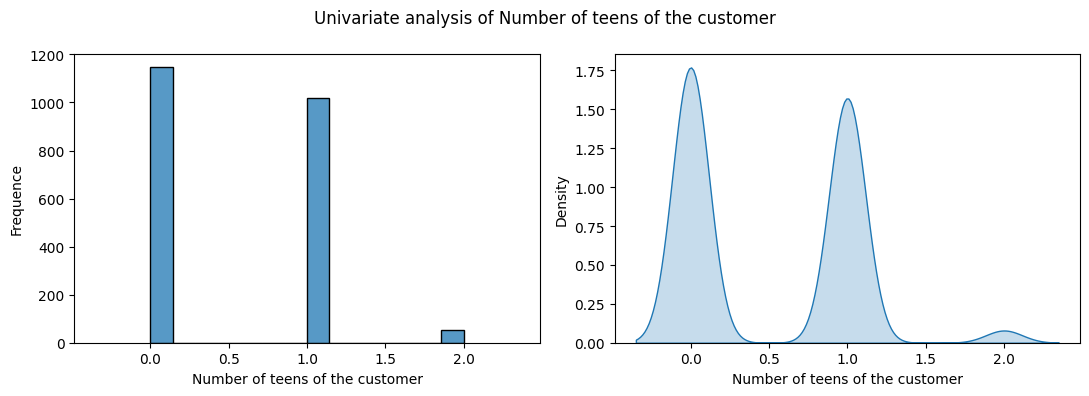

In [46]:
var = 'Teenhome'
var_title = 'Number of teens of the customer'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Children

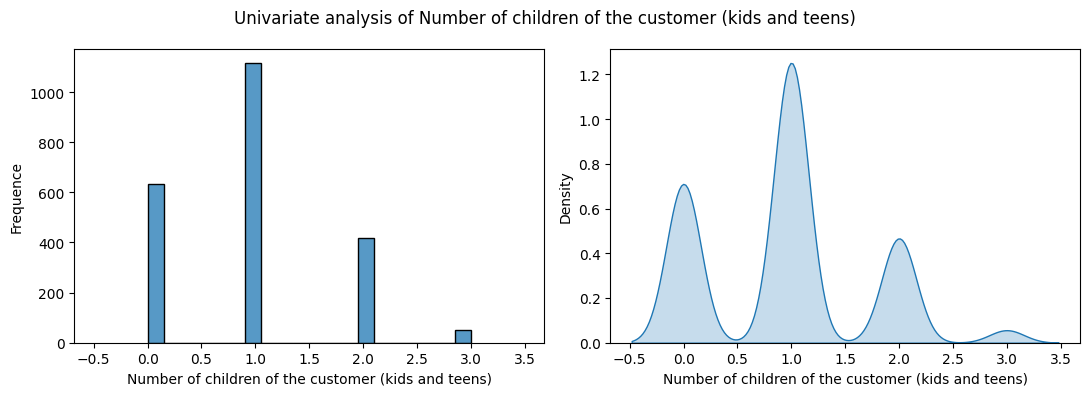

In [47]:
var = 'Children'
var_title = 'Number of children of the customer (kids and teens)'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Alone 

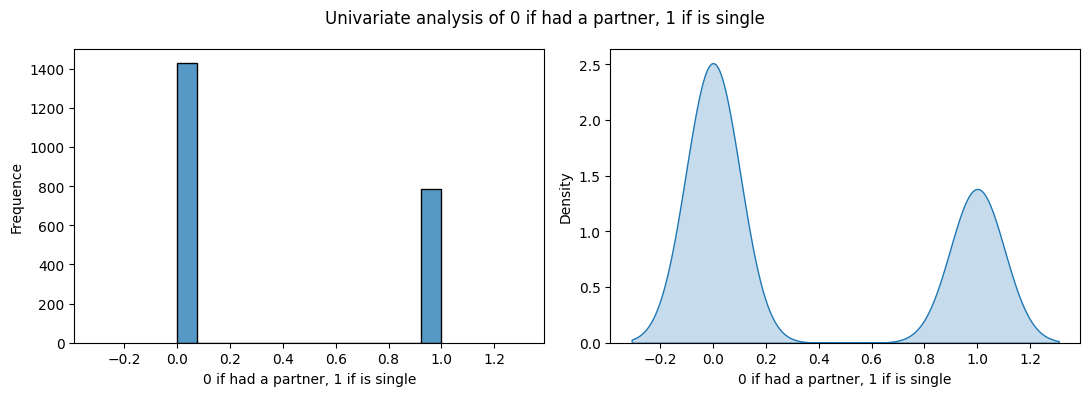

In [48]:
var = 'Alone'
var_title = '0 if had a partner, 1 if is single'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Family size

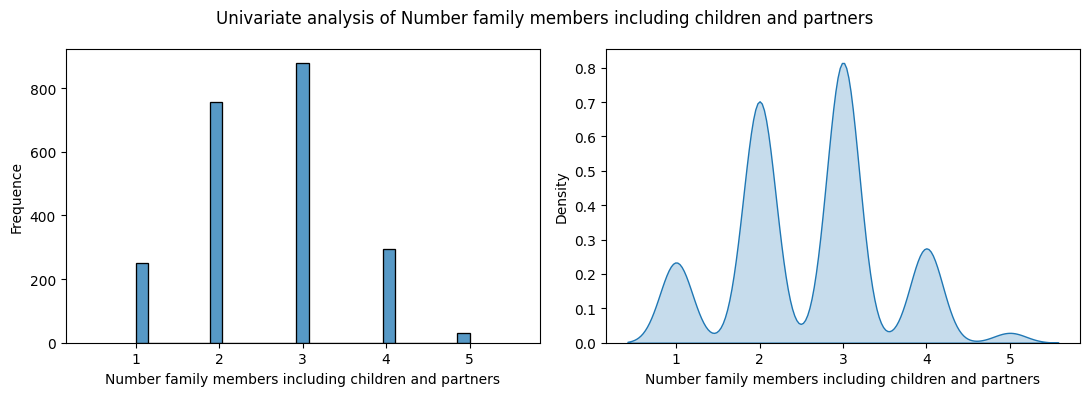

In [49]:
var = 'Family_Size'
var_title = 'Number family members including children and partners'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Spent

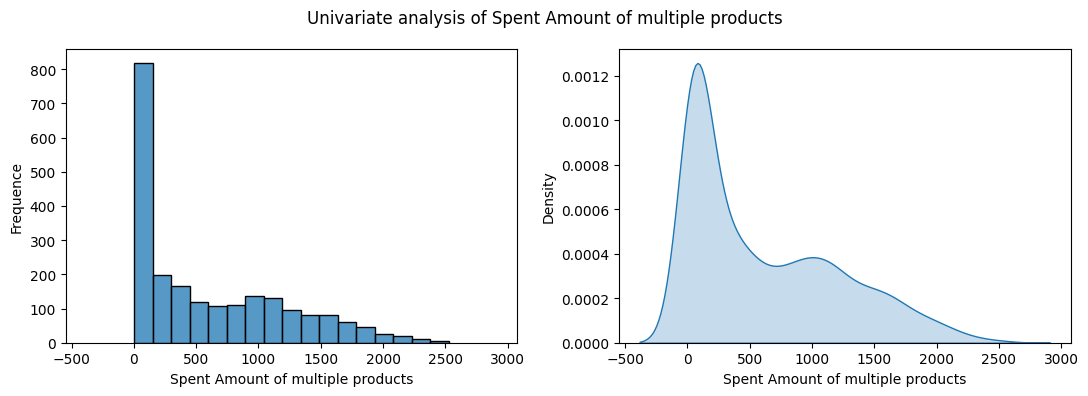

In [50]:
var = 'Spent'
var_title = 'Spent Amount of multiple products'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Deal Purchases

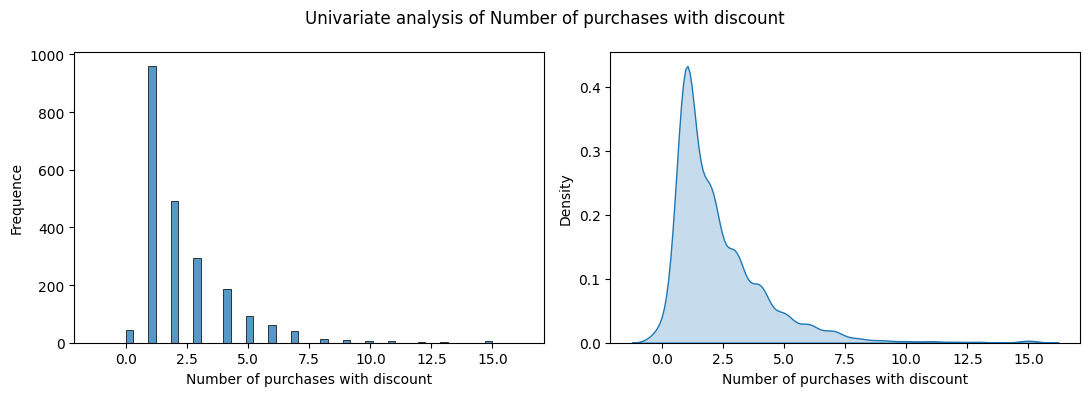

In [51]:
var = 'NumDealsPurchases'
var_title = 'Number of purchases with discount'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

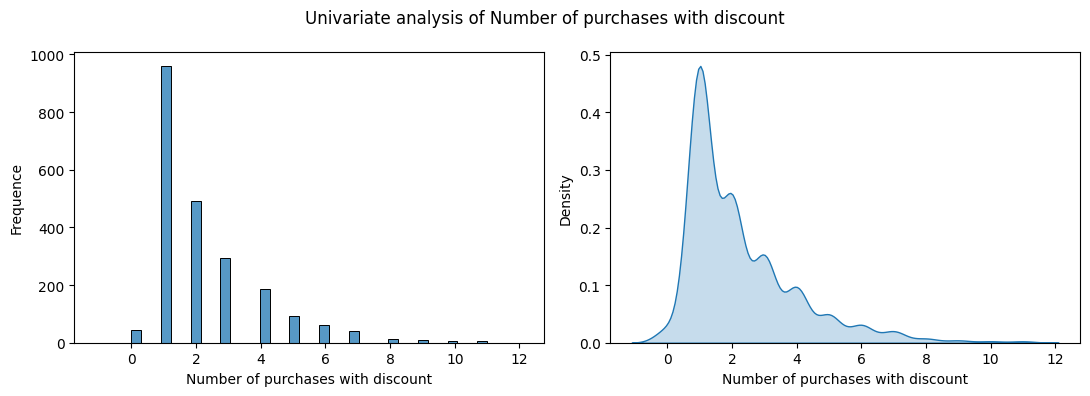

In [52]:
var = 'NumDealsPurchases'
var_title = 'Number of purchases with discount'
df = df.loc[df['NumDealsPurchases'] < 12] # (???) ask how to remove by percentage

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Web Purchases

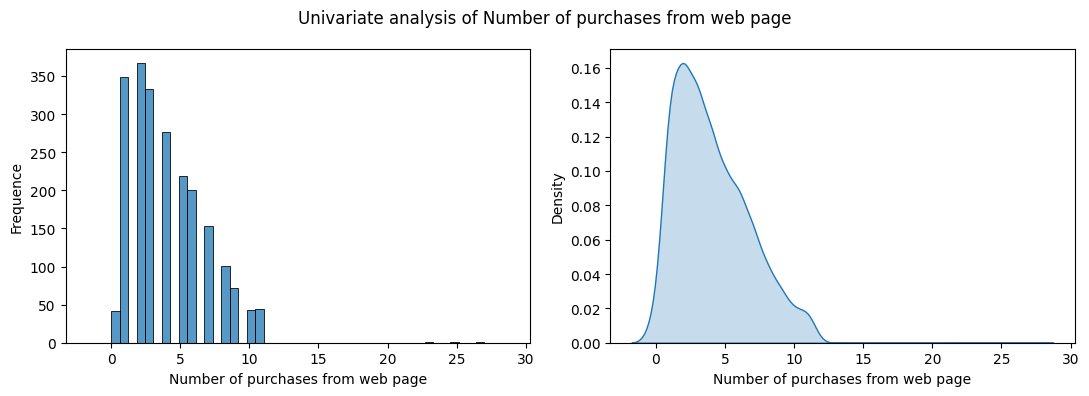

In [53]:
var = 'NumWebPurchases'
var_title = 'Number of purchases from web page'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

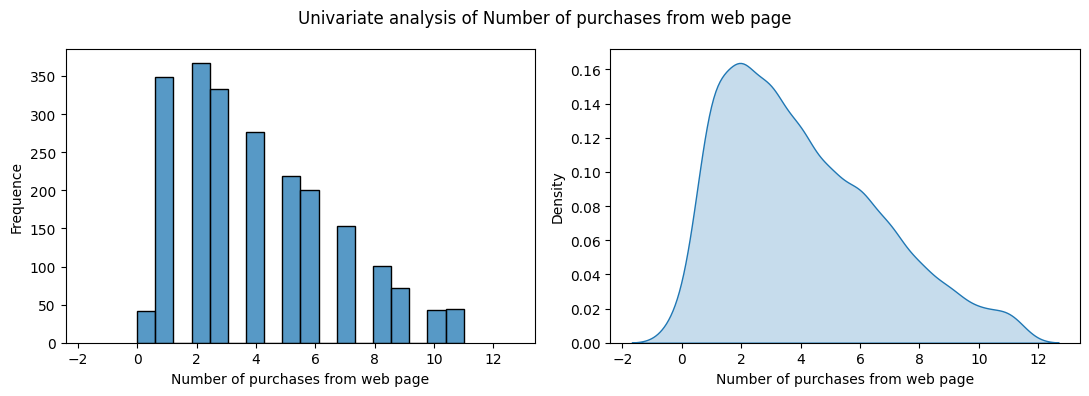

In [54]:
var = 'NumWebPurchases'
var_title = 'Number of purchases from web page'
df = df.loc[df['NumWebPurchases'] < 12] # (???) ask how to remove by percentage

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Catalog Purchases

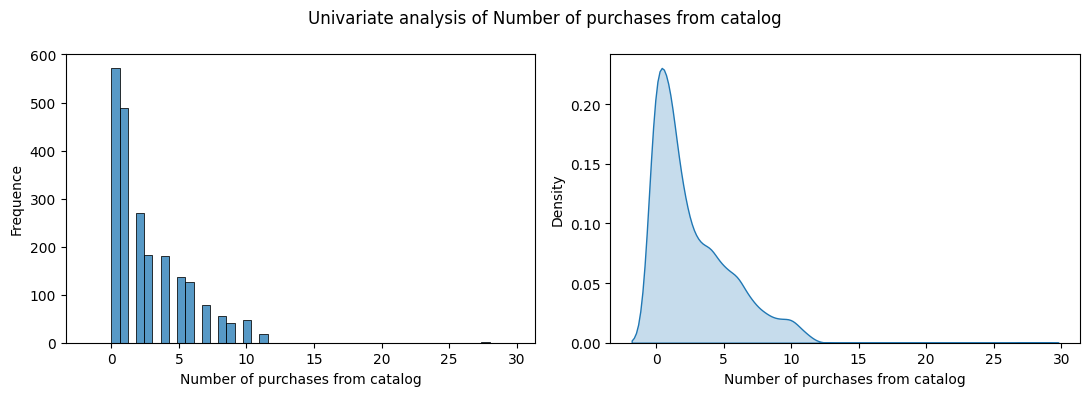

In [55]:
var = 'NumCatalogPurchases'
var_title = 'Number of purchases from catalog'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

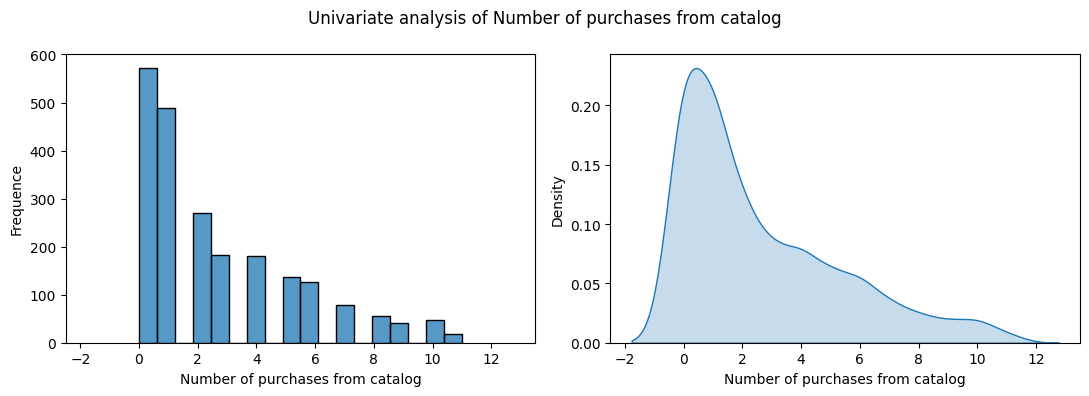

In [56]:
var = 'NumCatalogPurchases'
var_title = 'Number of purchases from catalog'
df = df.loc[df['NumCatalogPurchases'] < 12] # (???) ask how to remove by percentage

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Store Purchases

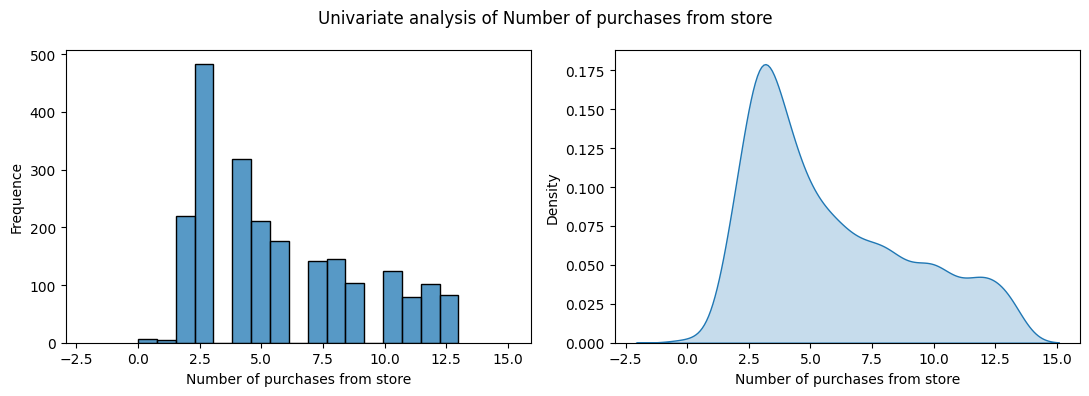

In [57]:
var = 'NumStorePurchases'
var_title = 'Number of purchases from store'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

### Web Visits per Month

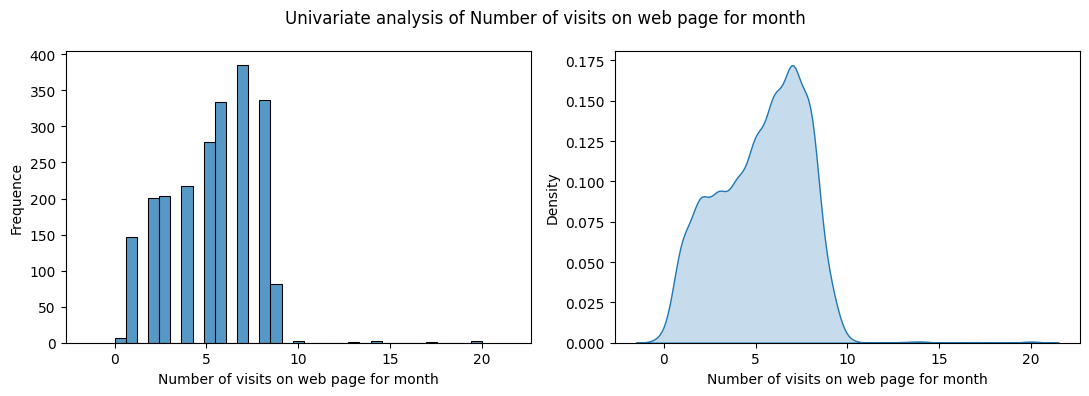

In [58]:
var = 'NumWebVisitsMonth'
var_title = 'Number of visits on web page for month'

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

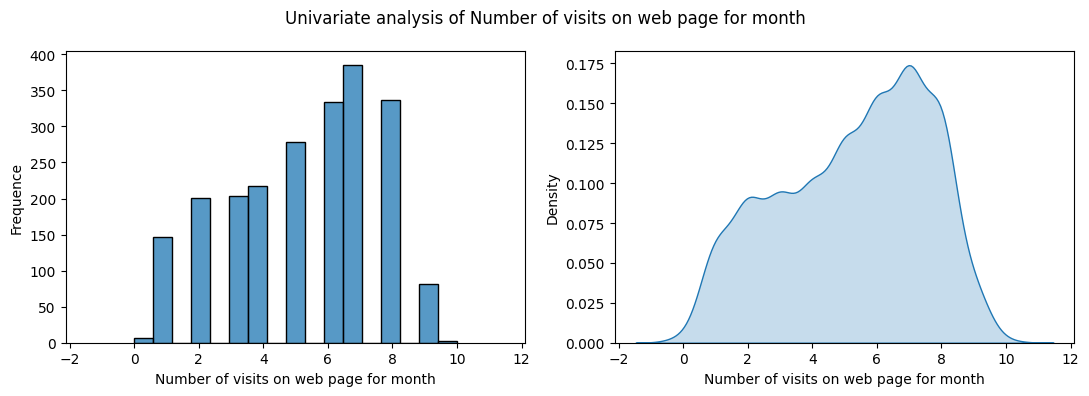

In [59]:
var = 'NumWebVisitsMonth'
var_title = 'Number of visits on web page for month'
df = df.loc[df['NumWebVisitsMonth'] < 12] # (???) ask how to remove by percentage

# Adjusting figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)

# Plot histogram
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frequence')

# Plot density curve
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

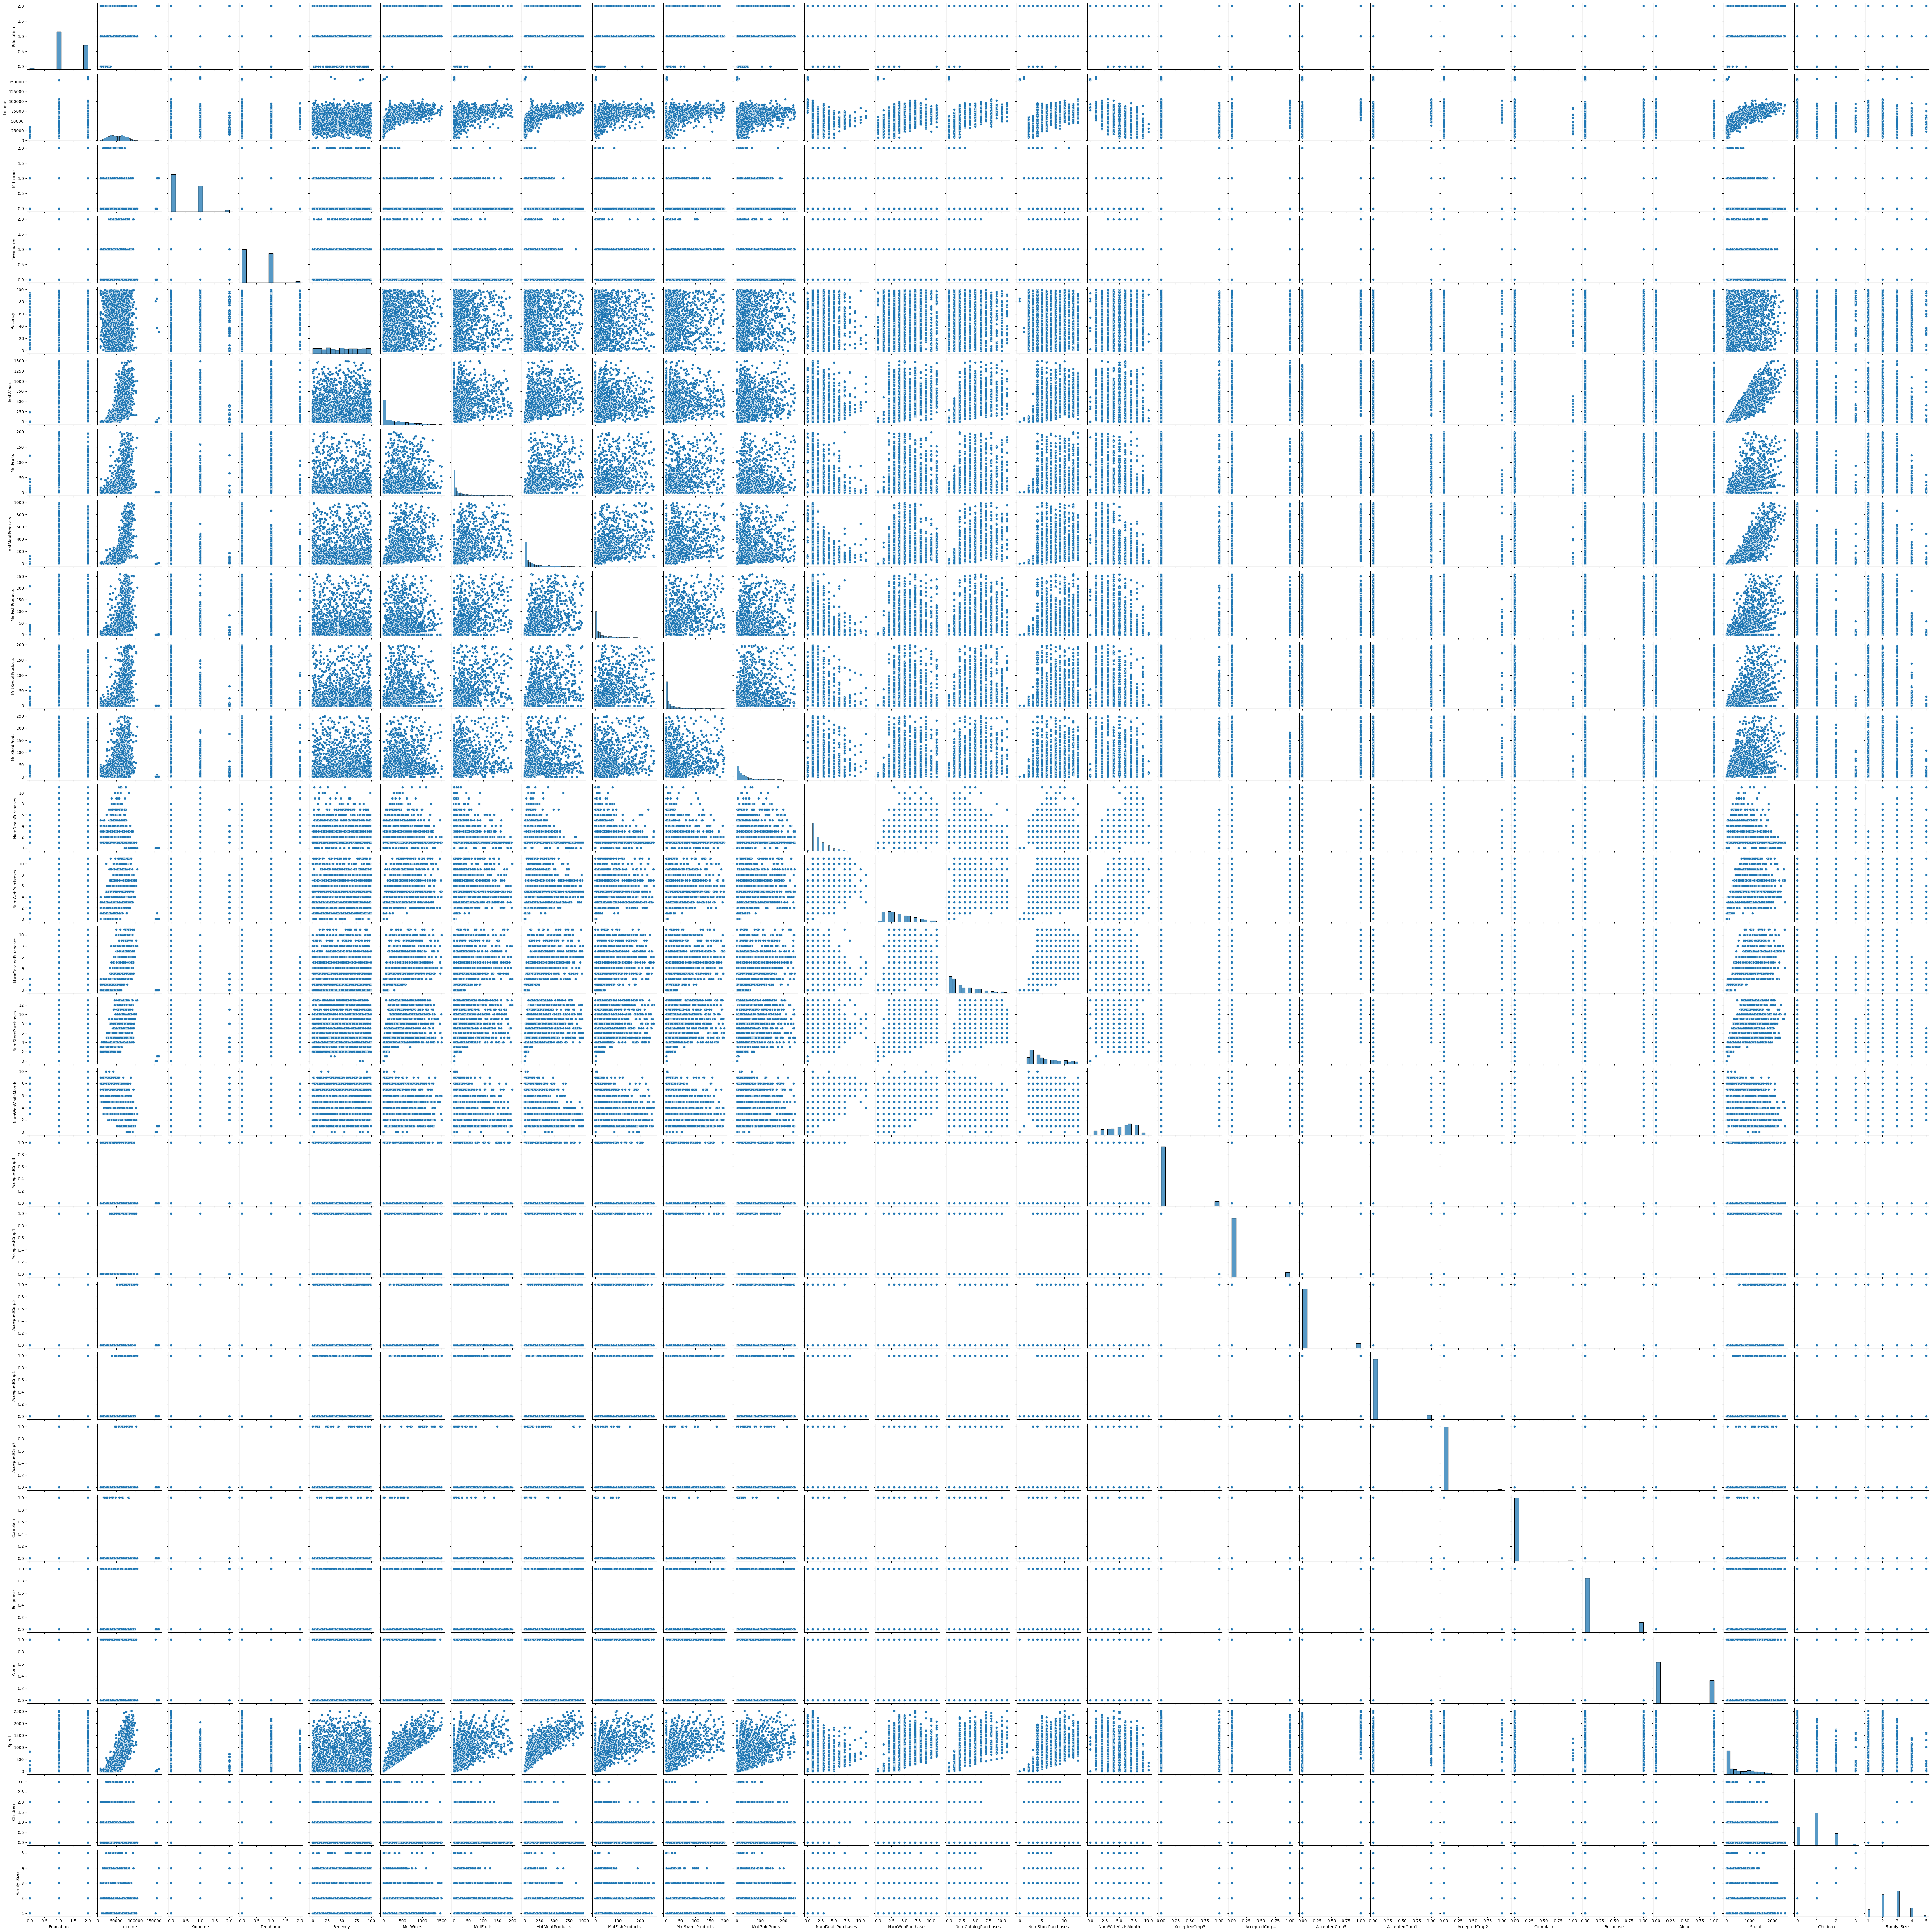

In [60]:
# All numeric data compared with all of them
df_test = df
sns.pairplot(df_test, diag_kind="hist")

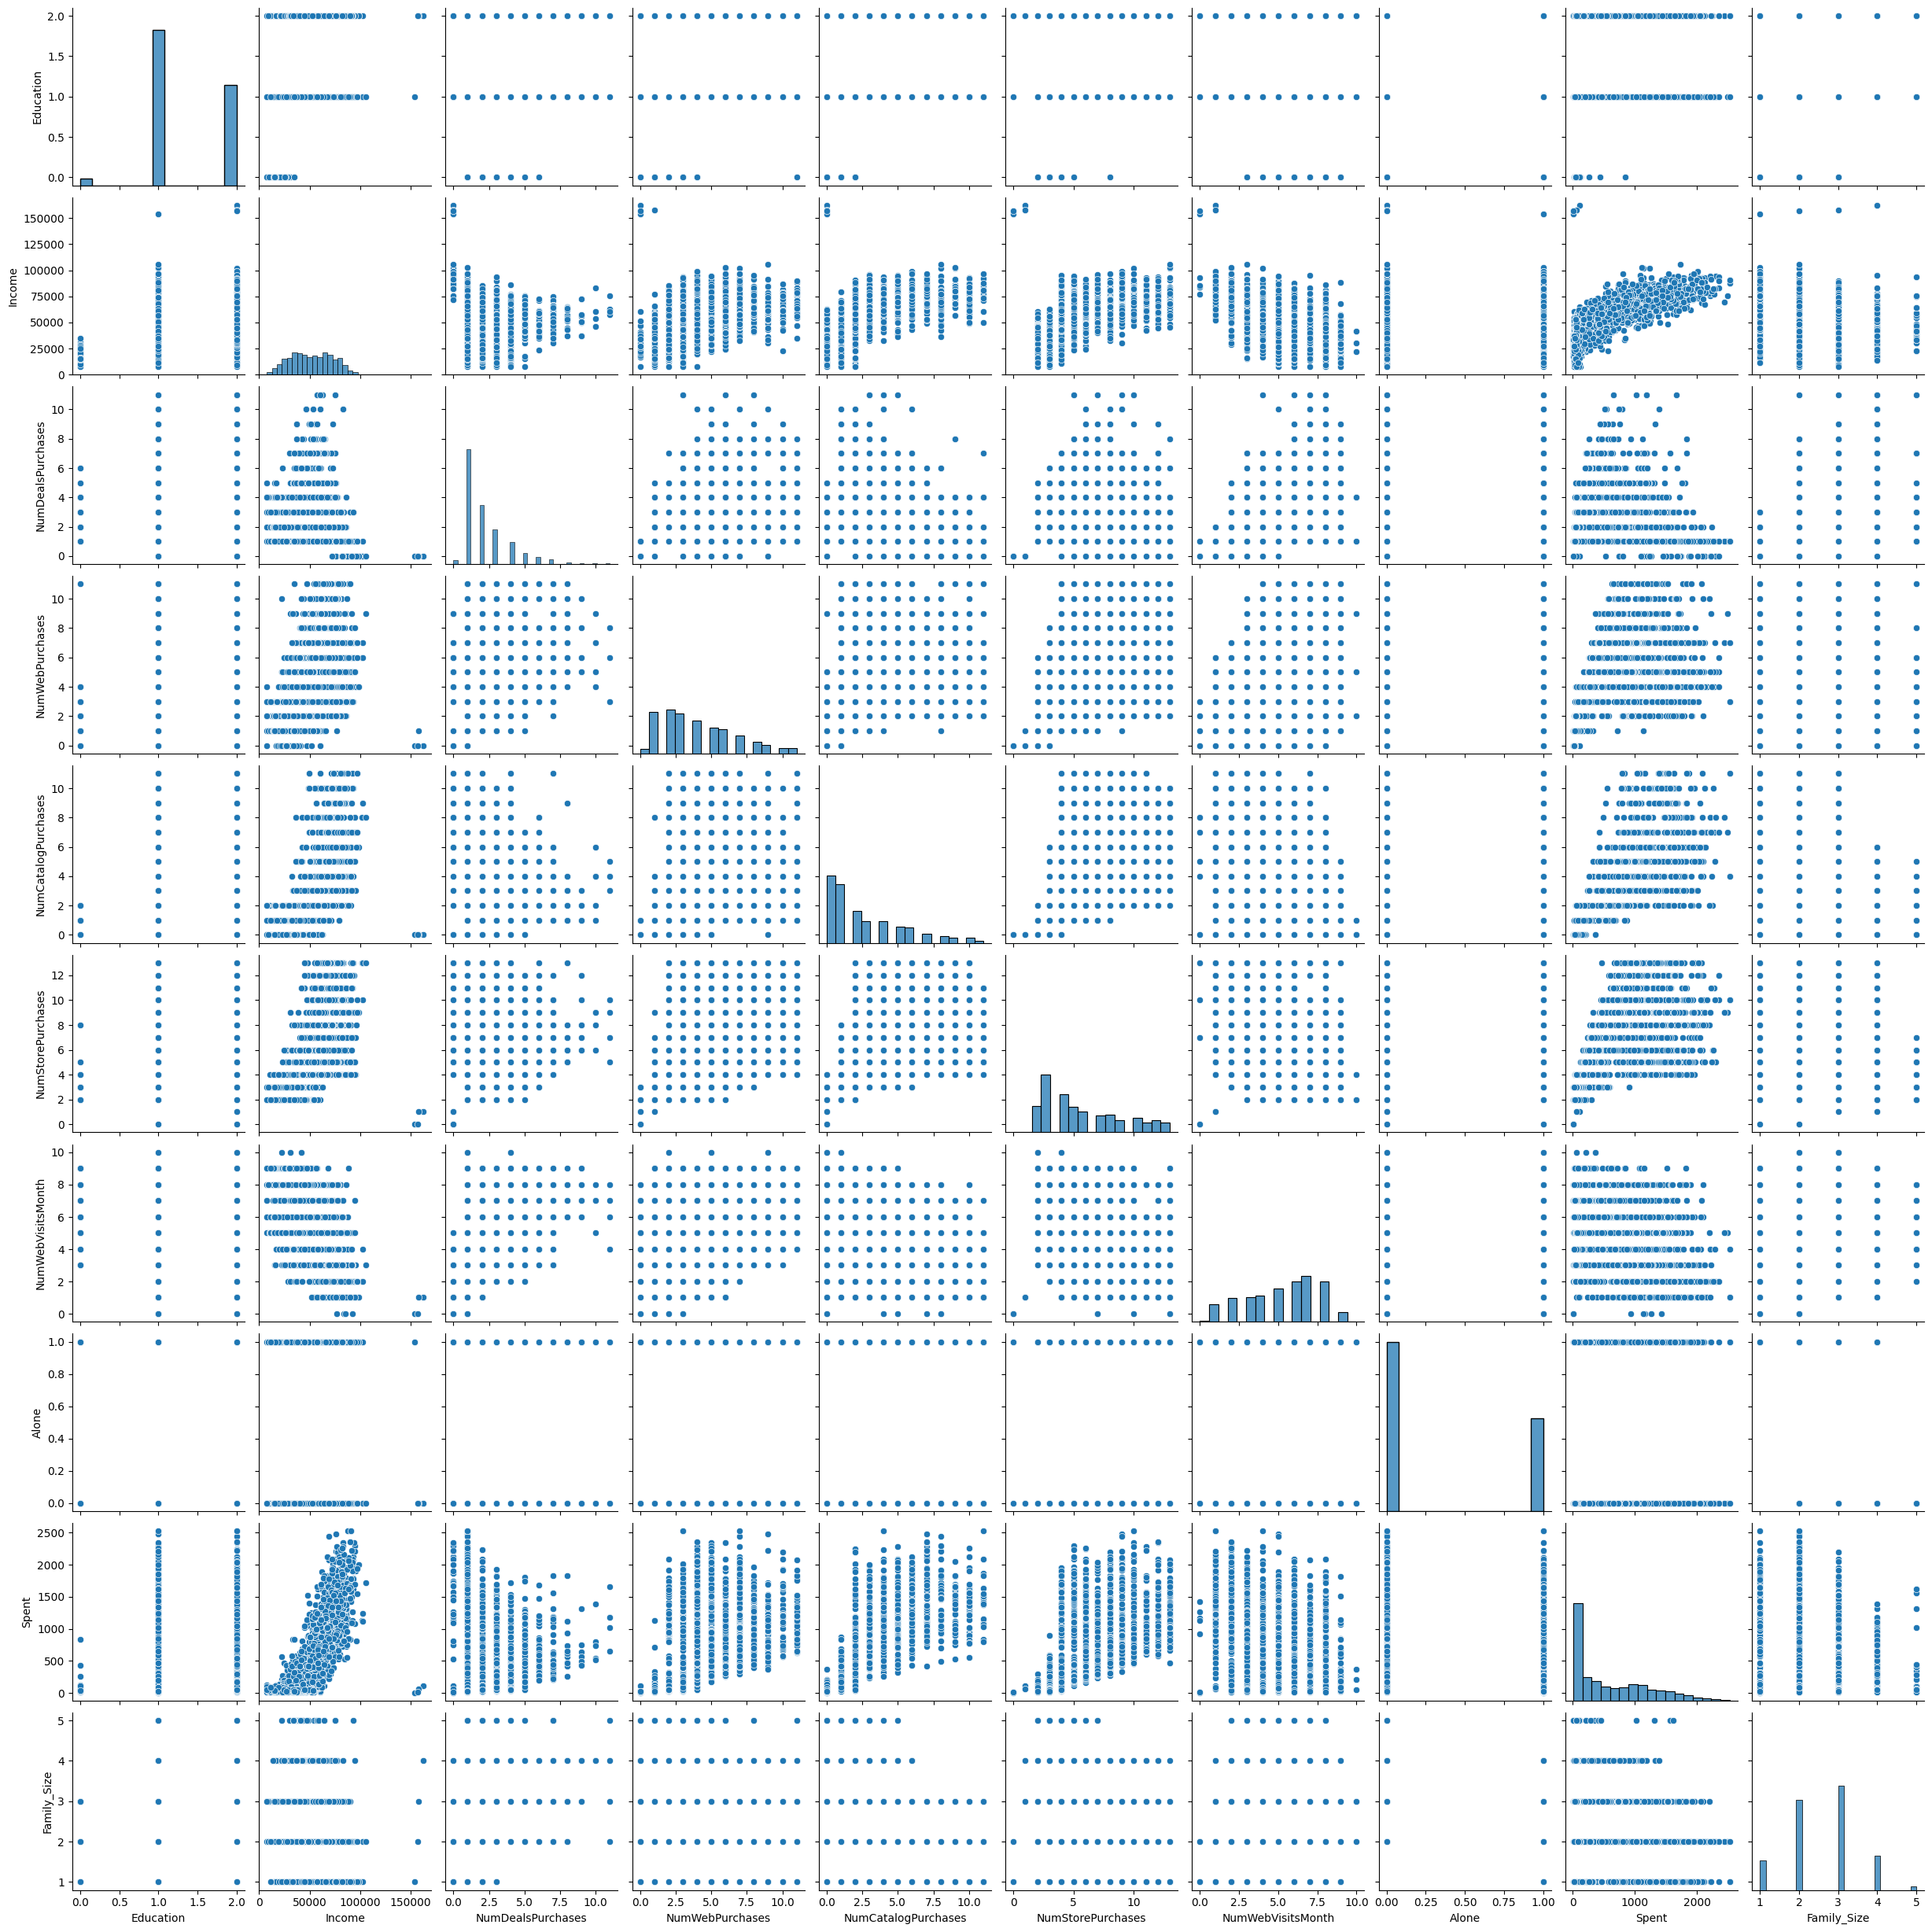

In [61]:
# All numeric data compared with all of them
delete = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome', 'Children',
    'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_test = df_test.drop(delete, axis=1)
sns.pairplot(df_test, diag_kind="hist")

3.7.3
0.12.2


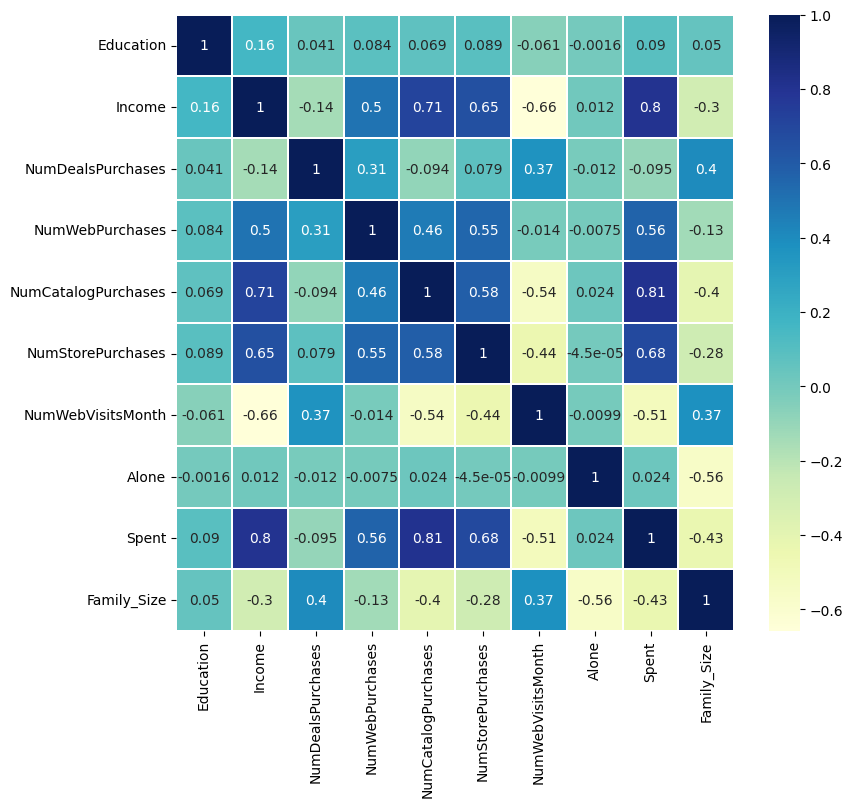

In [62]:
# Getting the correlation 
#print(df_test.corr())
corrmat = df_test.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 
#sns.heatmap(df_test.corr() ,annot=True) 
print(matplotlib.__version__)
print(sns.__version__)

## Multivariate analysis

### NumCatalogPurchases vs Income

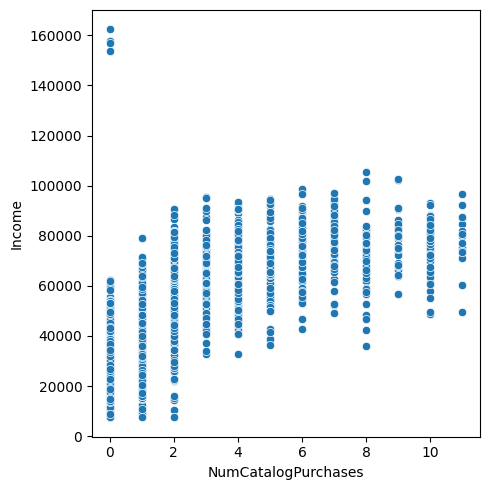

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="NumCatalogPurchases", y="Income", ax=ax)
plt.tight_layout()

### NumStorePurchases vs Income

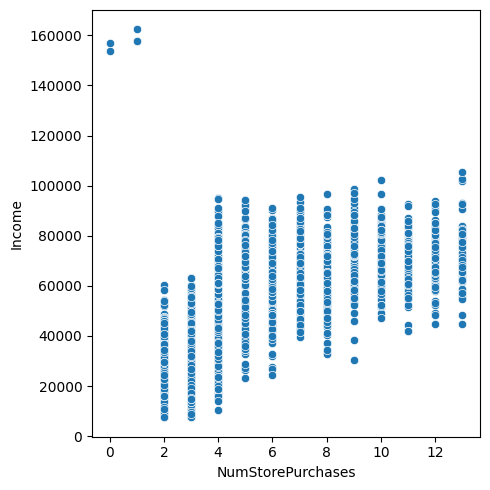

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="NumStorePurchases", y="Income", ax=ax)
plt.tight_layout()

### Spent vs Income

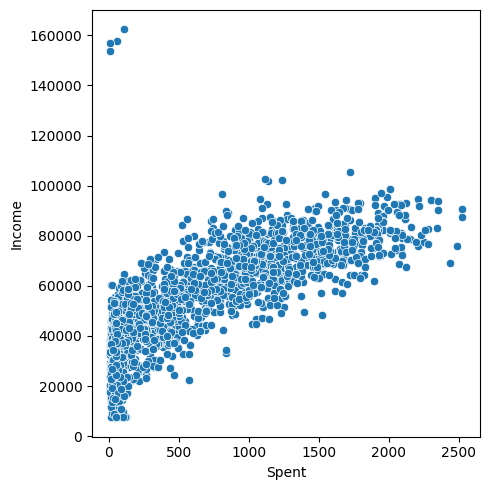

In [66]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Spent", y="Income", ax=ax)
plt.tight_layout()

### Spent vs NumCatalogPurchases

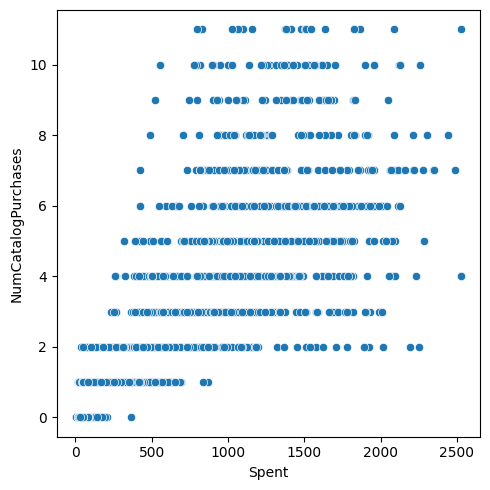

In [67]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Spent", y="NumCatalogPurchases", ax=ax)
plt.tight_layout()

### Spent vs NumStorePurchases

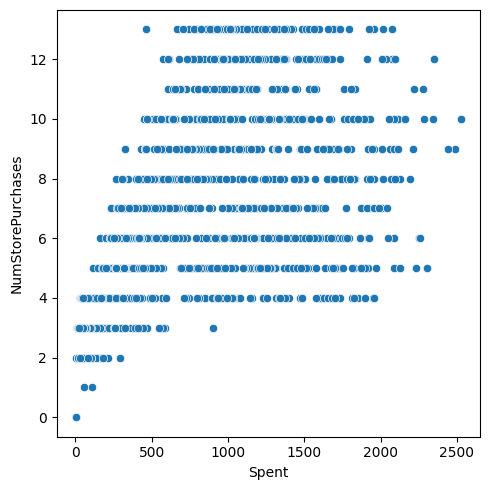

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Spent", y="NumStorePurchases", ax=ax)
plt.tight_layout()

## Set Train y testing

In [72]:
X, y = df, df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## PCA

In [80]:
#numero de componentes
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [81]:
#el acumulado de varianza explicada en las nuevas dimensiones
expl = pca.explained_variance_ratio_
print(expl)
print('suma',sum(expl))

[9.99512954e-01 3.98505754e-04 6.92907432e-05 1.02680797e-05
 3.48966759e-06 2.11900502e-06 1.91126118e-06 1.41727930e-06
 1.50950474e-08]
suma 0.9999999710772987


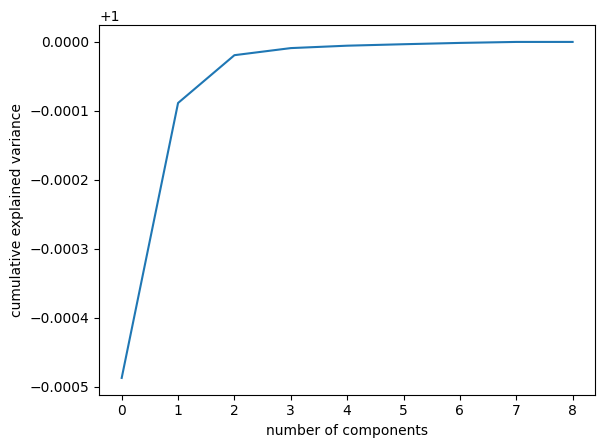

In [82]:
#graficar el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(expl))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Principal component analysis (PCA)

In [84]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
df_pca = pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2','PC3'])
df_pca.describe()

PC1           PC2           PC3
count  1.534000e+03  1.534000e+03  1.534000e+03
mean   6.830104e-13  7.114691e-15  1.096848e-14
std    2.082973e+04  4.159171e+02  1.734312e+02
min   -4.431889e+04 -1.708818e+03 -6.642300e+02
25%   -1.661082e+04 -2.226493e+02 -5.975289e+01
50%   -1.069491e+03  4.274069e+01  9.609841e+00
75%    1.634273e+04  2.532970e+02  5.137456e+01
max    1.105223e+05  3.597001e+03  7.170444e+02

In [87]:
print("Number of train data: " + str(len(X_train_pca)))
print("Number of test data: " + str(len(X_test_pca)))

Number of train data: 1534
Number of test data: 658


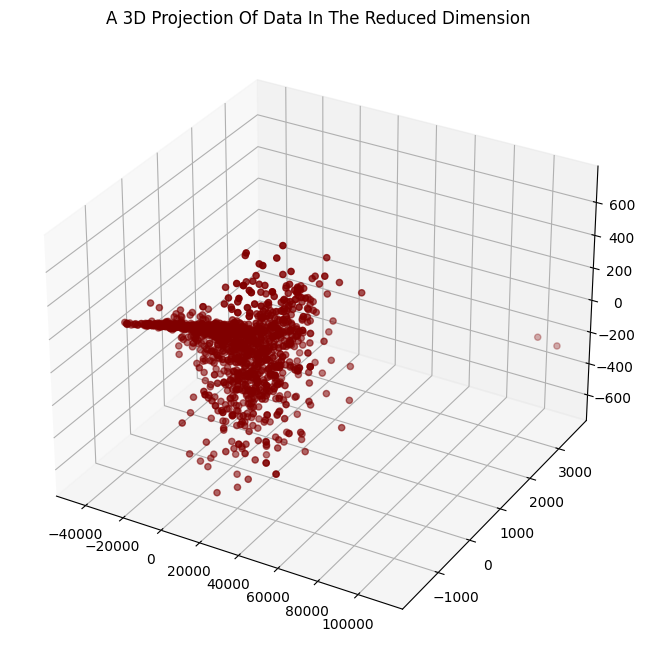

In [88]:
#A 3D Projection Of Data In The Reduced Dimension
x = df_pca["PC1"]
y = df_pca["PC2"]
z = df_pca["PC3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Kmeans++ 

## DOUBTS // BACKUP

In [63]:
"""df_c = df.copy()

# Droping some features (???)
delete = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df_c = df_c.drop(delete, axis=1)

# Scaling/Normal (???)
scaler = StandardScaler()
scaler.fit_transform(df_c)
scaled_df = pd.DataFrame(scaler.transform(df_c), columns = df_c.columns)
scaled_df.head()"""

"df_c = df.copy()\n\n# Droping some features (???)\ndelete = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']\ndf_c = df_c.drop(delete, axis=1)\n\n# Scaling/Normal (???)\nscaler = StandardScaler()\nscaler.fit_transform(df_c)\nscaled_df = pd.DataFrame(scaler.transform(df_c), columns = df_c.columns)\nscaled_df.head()"